In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import pprint
import json
from time import sleep
from datetime import date

# Incorporated citipy to determine city based on latitude and longitude
# pip install citipy
from citipy import citipy

# Output File location
output_folder = "output_data"

In [2]:
# Allows me to control # of rows for faster testing
max_rows = 1000 

df = pd.read_csv('../source_data/detail_listings.zip', low_memory=False)
df.head()

rows_in_df = len(df)
print(f'Data set has {rows_in_df} rows')

# Drop unneeded columns:
df = df.drop(columns = [
    "listing_url", 
    "thumbnail_url", 
    "picture_url", 
    "medium_url", 
    "xl_picture_url", 
    "host_url", 
    "host_thumbnail_url", 
    "host_picture_url", 
    "scrape_id",
    "host_acceptance_rate" # NaN
])
for col in df.columns: 
    print(col)
    if "_url" in col:
        print(col) 

df.head(10)

# if  rows_in_df > max_rows: 
#    df = df.head(max_rows)
#    print(f'**** For testing purposes, removed rows. df now only has {max_rows}')

Data set has 23745 rows
id
last_scraped
name
summary
space
description
experiences_offered
neighborhood_overview
notes
transit
access
interaction
house_rules
host_id
host_name
host_since
host_location
host_about
host_response_time
host_response_rate
host_is_superhost
host_neighbourhood
host_listings_count
host_total_listings_count
host_verifications
host_has_profile_pic
host_identity_verified
street
neighbourhood
neighbourhood_cleansed
neighbourhood_group_cleansed
city
state
zipcode
market
smart_location
country_code
country
latitude
longitude
is_location_exact
property_type
room_type
accommodates
bathrooms
bedrooms
beds
bed_type
amenities
square_feet
price
weekly_price
monthly_price
security_deposit
cleaning_fee
guests_included
extra_people
minimum_nights
maximum_nights
minimum_minimum_nights
maximum_minimum_nights
minimum_maximum_nights
maximum_maximum_nights
minimum_nights_avg_ntm
maximum_nights_avg_ntm
calendar_updated
has_availability
availability_30
availability_60
availability_9

,id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,...,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,5065,2019-12-04,MAUKA BB,"Perfect for your vacation, Staycation or just ...",Mauka B & B is 400 square feet studio with a p...,"Perfect for your vacation, Staycation or just ...",none,Neighbors here are friendly but are not really...,Located near by is Kalopa State Park with 100 ...,There is a bus stop located in Honoka'a town ...,...,f,f,moderate,f,f,2,2,0,0,0.45
1,5269,2019-12-05,Upcountry Hospitality in the 'Auwai Suite,"The 'Auwai Suite is a lovely, self-contained a...","The ‘Auwai Suite is a lovely, self-contained a...","The 'Auwai Suite is a lovely, self-contained a...",none,"We are located on the ""sunny side"" of Waimea, ...",NaN,One parking spot is provided with your stay.,...,t,f,strict_14_with_grace_period,f,f,5,4,1,0,0.09
2,5387,2019-12-04,Hale Koa Studio & 1 Bedroom Units!!,This Wonderful Spacious Studio apt/flat is in ...,"Hale Koa Duplex: This duplex has a wonderful, ...",This Wonderful Spacious Studio apt/flat is in ...,none,IN a Farm belt area with small commercial farm...,tropical setting with view and easy access to ...,"Close to Major highway (belt road) accessable,...",...,t,f,strict_14_with_grace_period,f,f,3,3,0,0,1.36
3,5389,2019-12-05,Keauhou Villa,It is less than 10 minute walk to the Keauhou ...,"Location: Keauhou, Kona Coast, Big Island, Haw...",It is less than 10 minute walk to the Keauhou ...,none,It is less than 10 minute walk to the Keauhou ...,It is less than 10 minute walk to the Keauhou ...,It is less than 10 minute walk to the Keauhou ...,...,f,f,flexible,f,f,3,3,0,0,0.23
4,5390,2019-12-05,STAY AT PRINCE KUHIO!,NaN,"Prince Kuhio, Studio Unit. Sleeps 2 privately....","Prince Kuhio, Studio Unit. Sleeps 2 privately....",none,NaN,NaN,NaN,...,f,f,strict_14_with_grace_period,f,f,1,1,0,0,1.01
5,5434,2019-12-04,Kauai Ocean View 3 Story Tiki Tower North Shore,"Hawaiian architecture , post and beam construc...","Our pristine and private 3 story, 3 bedroom, 2...","Hawaiian architecture , post and beam construc...",none,The resort community of Princeville has many t...,Hideaways beach is a beautiful scenic beach th...,It is best to rent a vehicle to experience the...,...,f,f,strict_14_with_grace_period,f,f,2,2,0,0,0.82
6,5480,2019-12-04,Isle Of You Naturally Farm Retreat,The Best Choice for your Nudist Retreat. Where...,"Hey, want to stay someplace real for your next...",The Best Choice for your Nudist Retreat. Where...,none,We are located on a rural one lane road going ...,NaN,You should hire a car to get you around the is...,...,f,f,strict_14_with_grace_period,f,f,3,0,3,0,NaN
7,5930,2019-12-05,Poipu Beach Guest House--- Orchid,Orchid is a first floor unit with private bat...,"From your front door, walk Southeast for just ...",Orchid is a first floor unit with private bat...,none,"One of the best locations on Kauai, on a smal...",County of Kauai Permit TVR 4265,NaN,...,t,f,moderate,f,f,4,1,3,0,1.54
8,7896,2019-12-05,Beachfront Maui Sunset Condo,"GREAT VALUE ON THE BEACH! Remodeled Condo, Tas...",Sleeps up to 4 people. The Maui Sunset beachfr...,"GREAT VALUE ON THE BEACH! Remodeled Condo, Tas...",none,Conveniently located to all the sights on the ...,Beachfront resort. Free parking. Bus stop outs...,A rental car is suggested. There is local bus ...,...,f,f,strict_14_with_grace_period,f,f,1,1,0,0,0.25
9,8833,2019-12-04,Stay in the Heart of Kona,Our condo is located right across the street f...,Stay at the ROYAL KAHILI CONDOMINIUMS with a g...,Our condo is located right across the street f...,none,"Close to the heart of downtown Kona, but far e...",W (Phone number hidden by Airbnb),The best way t

In [3]:
df.describe()

,id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,beds,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
count,2.374500e+04,2.374500e+04,23469.000000,23469.000000,23745.000000,23745.000000,23745.000000,23734.000000,23726.000000,23701.000000,...,18104.000000,18098.000000,18102.000000,18098.000000,18097.000000,23745.000000,23745.000000,23745.000000,23745.000000,18294.000000
mean,2.309861e+07,8.757279e+07,58.569517,58.569517,20.881056,-157.128280,4.602864,1.601068,1.544382,2.376862,...,9.518946,9.788319,9.749917,9.807769,9.430845,42.577090,41.767993,0.537039,0.043546,1.398526
std,1.102912e+07,7.746664e+07,123.722747,123.722747,0.790525,1.242902,2.386552,0.892971,1.148395,1.598890,...,0.838487,0.662549,0.710551,0.529936,0.855745,68.151171,68.403444,2.160893,0.541372,1.523295
min,5.065000e+03,9.080000e+02,0.000000,0.000000,18.920990,-159.714900,1.000000,0.000000,0.000000,0.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,1.534072e+07,2.090564e+07,2.000000,2.000000,20.690630,-157.837800,3.000000,1.000000,1.000000,1.000000,...,9.000000,10.000000,10.000000,10.000000,9.000000,2.000000,1.000000,0.000000,0.000000,0.300000
50%,2.345470e+07,6.567843e+07,8.000000,8.000000,20.952780,-156.688670,4.000000,1.000000,1.000000,2.000000,...,10.000000,10.000000,10.000000,10.000000,10.000000,7.000000,5.000000,0.000000,0.000000,0.880000
75%,3.237924e+07,1.364377e+08,63.000000,63.000000,21.300390,-156.380400,6.000000,2.000000,2.000000,3.000000,...,10.000000,10.000000,10.000000,10.000000,10.000000,54.000000,51.000000,0.000000,0.000000,2.020000
max,4.057122e+07,3.141222e+08,1717.000000,1717.000000,22.229110,-154.815770,38.000000,14.000000,16.000000,38.000000,...,10.000000,10.000000,10.000000,10.000000,10.000000,279.000000,279.000000,31.000000,11.000000,22.600000


### Lance Code Starts Here

In [4]:
# grouping by columns needed and taking average of ratings per island
average_rating_island = df.groupby("neighbourhood_group_cleansed").mean()["review_scores_rating"]
properties_island = df.groupby("neighbourhood_group_cleansed").count()["id"]

average_rating_island.head()


neighbourhood_group_cleansed
Hawaii      95.483893
Honolulu    93.690300
Kauai       94.907945
Maui        95.160074
Name: review_scores_rating, dtype: float64

<function matplotlib.pyplot.show(*args, **kw)>

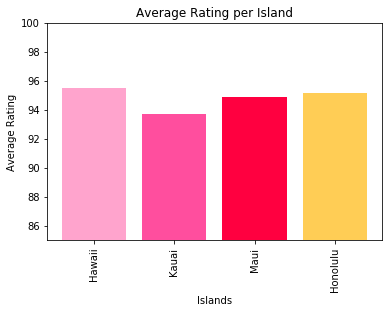

In [6]:
# set x and y axis for bar graph
x_axis = df["neighbourhood_group_cleansed"].unique()
y_axis = average_rating_island

# print lables/title and x/y limits to improve visual
plt.title("Average Rating per Island")
plt.xlabel("Islands")
plt.ylabel("Average Rating")
plt.xticks(rotation=90)
plt.ylim(85, 100)

# define color scheme
hawaiian_hibiscus_hex_palette = ["#ffa4cd", "#ff4e9e", "#ff0040", "#ffcd55", "#ffa700"]

# display graph
plt.bar(x_axis, y_axis, color = hawaiian_hibiscus_hex_palette)
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

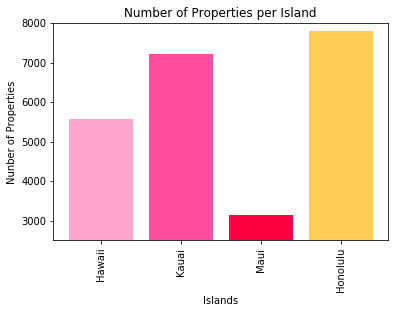

In [7]:
# set x and y axis for bar graph
x_axis = df["neighbourhood_group_cleansed"].unique()
y_axis = properties_island

# print lables/title and x/y limits to improve visual
plt.title("Number of Properties per Island")
plt.xlabel("Islands")
plt.ylabel("Nunber of Properties")
plt.xticks(rotation=90)
plt.ylim(2500, 8000)

# display graph
plt.bar(x_axis, y_axis, color = hawaiian_hibiscus_hex_palette)
plt.show

In [18]:
average_rating_prop = df.groupby("property_type").mean()["review_scores_rating"]
#property_type = df.groupby("property_type").count()["id"]

# dropped NaN values for property types that do not have ratings in hawaii such as 'igloo'
average_rating_prop = average_rating_prop.dropna()
average_rating_prop


property_type
Aparthotel                 92.649123
Apartment                  93.818507
Barn                       95.333333
Bed and breakfast          95.806061
Boat                       95.166667
Boutique hotel             89.837209
Bungalow                   95.305732
Bus                        97.000000
Cabin                      94.255814
Camper/RV                  93.411765
Campsite                   95.500000
Casa particular (Cuba)     93.000000
Castle                     96.000000
Chalet                     90.200000
Condominium                94.314708
Cottage                    96.919094
Dome house                 95.000000
Dorm                       88.000000
Earth house                95.500000
Farm stay                  96.988636
Guest suite                96.588076
Guesthouse                 96.773270
Hostel                     86.384615
Hotel                      90.876923
House                      95.416327
Hut                        95.000000
Island                  

ValueError: shape mismatch: objects cannot be broadcast to a single shape

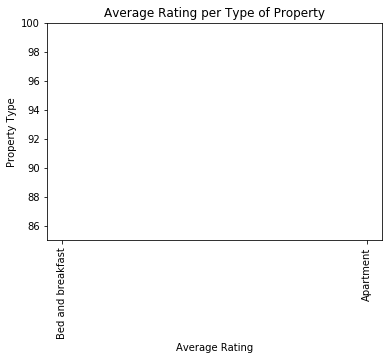

In [20]:
# set x and y axis for bar graph
x_axis = df["property_type"].unique()
y_axis = average_rating_prop

# print lables/title and x/y limits to improve visual
plt.title("Average Rating per Type of Property")
plt.xlabel("Average Rating")
plt.ylabel("Property Type")
plt.xticks(rotation=90)
plt.ylim(85, 100)

# display graph
plt.bar(x_axis, y_axis, color = hawaiian_hibiscus_hex_palette)
plt.show

Text(0.5, 1.0, 'Property types availability in AirBnB')

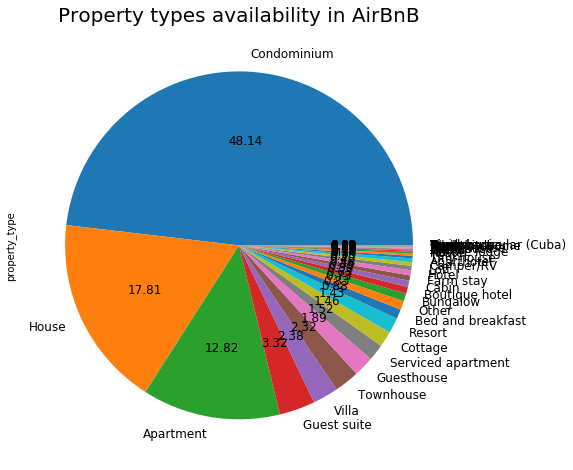

In [10]:
prop_type_pie=df.property_type.value_counts()/len(df.property_type)
prop_type_pie.plot.pie(autopct='%.2f',fontsize=12,figsize=(8,8))
plt.title('Property types availability in AirBnB',fontsize=20)

Text(0.5, 1.0, 'Property types availability in AirBnB')

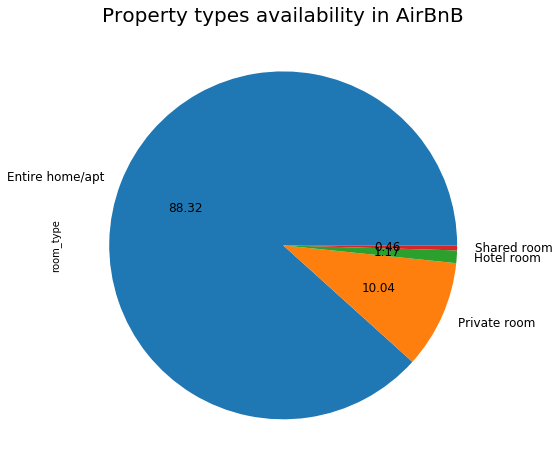

In [12]:
room_type_pie=df.room_type.value_counts()/len(df.room_type)
room_type_pie.plot.pie(autopct='%.2f',fontsize=12,figsize=(8,8))
plt.title('Property types availability in AirBnB',fontsize=20)

Text(0.5, 1.0, 'Neighbourhood groups Vs Room types availability')

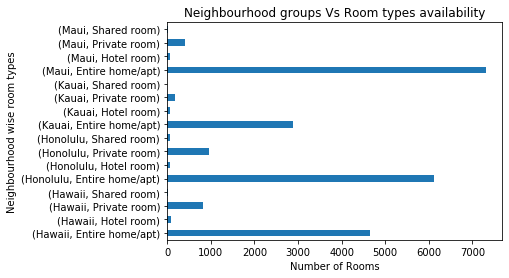

In [13]:
df.groupby(['neighbourhood_group_cleansed','room_type']).room_type.count().plot.barh(stacked=True)
plt.ylabel('Neighbourhood wise room types')
plt.xlabel('Number of Rooms')
plt.title('Neighbourhood groups Vs Room types availability')

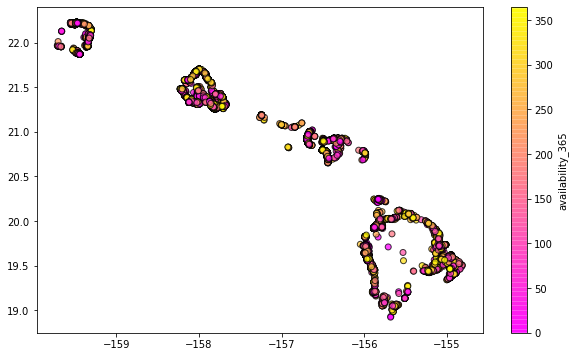

In [14]:
plt.figure(figsize=(10,6))
plt.scatter(df.longitude, df.latitude, c=df.availability_365, cmap='spring', edgecolor='black', linewidth=1, alpha=0.75)

cbar = plt.colorbar()
cbar.set_label('availability_365')